In [1]:
import numpy as np
import pandas as pd
import scipy.stats as stats


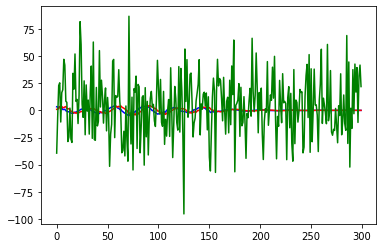

In [28]:


points = 300

sigma = 0.3 # mean and standard deviation
a = np.random.normal(1, sigma, points)
b = np.random.normal(3, sigma, points)

c_1 = np.ones(points//2)
c_2= np.array([1/np.sqrt(max(t,1)) for t in range(points//4)])
c_3= np.array([1/(t+4) for t in range(points//4)])

c = np.append(c_1, c_2)
c = np.append(c, c_3)

err = np.random.normal(0, sigma, points)

err2 = np.random.normal(0.5, 10*sigma, points)



t = np.array(range(points))

frec1 = 5
frec2 =7


x = c*(a * np.sin(2*np.pi * (t/200) * frec1) + b * np.cos(2*np.pi * (t/200) * frec2) + err)

y = c*(a * np.sin(2*np.pi * ((t-5)/200) * frec1) + b * np.cos(2*np.pi * ((t-5)/200) * frec2) + err)

z = 10*err2

import matplotlib.pyplot as plt



plt.plot(t,x, color='b')
plt.plot(t,y, color='r')
plt.plot(t,z, color='g')

plt.show()

In [6]:
def generate_data_lasso_problem(x,y, L):
    data_x = []
    data_y = []
    y_vals = []
    for t in range(L,len(x)):
        y_t = y[t-1]
        x_prev = x[t-L:t-1]
        y_prev = y[t-L:t-1]
        data_x.append(x_prev)
        data_y.append(y_prev)
        y_vals.append(y_t)
    return np.array(data_x),np.array(data_y), np.array(y_vals)

def generate_data_lasso_problem2(x,y, L):
    data_x = []
    data_y = []
    y_vals = []
    for t in range(L,len(x)):
        y_t = y[t-1]
        x_prev = x[t-L:t-1]
        y_prev = y[t-L:t-1]
        data_x.append(x_prev)
        y_vals.append(y_t)
    return np.array(data_x), np.array(y_vals)



def apply_lagg(x,L):
    data_x = []
    for t in range(L,len(x)):
        x_prev = x[t-L:t-1]
        data_x.append(x_prev)
    return np.array(data_x)


def generate_data_lasso_problem_multiple(x_array,y, L):
    
    data_x_array = []
    data_y = apply_lagg(y,L)
        
    for x in x_array:
        data_x_array.append(apply_lagg(x,L))
    
    y_vals = []
    for t in range(L,len(x)):
        y_t = y[t-1]
        y_vals.append(y_t)
        
    data = np.block(data_x_array)
        
    return data,np.array(data_y), np.array(y_vals)

In [ ]:
    
    
    data_y = []
    y_vals = []
    for t in range(L,len(x)):
        y_t = y[t-1]
        x_prev = x[t-L:t-1]
        y_prev = y[t-L:t-1]
        data_x.append(x_prev)
        data_y.append(y_prev)
        y_vals.append(y_t)
    return np.array(data_x),np.array(data_y), np.array(y_vals)

In [11]:
a = np.array([[1, 2, 3],[1, 2, 3]])

b = np.array([[4, 5, 6], [4, 5, 6]])

c = np.block([a, b])
c

array([[1, 2, 3, 4, 5, 6],
       [1, 2, 3, 4, 5, 6]])

In [29]:
from sklearn import linear_model
clf = linear_model.Lasso(alpha=0.1)


for i in range(2,20):
    data_x, data_y, y_vals = generate_data_lasso_problem(x,y, i)
    
    data = np.block([data_y, data_x])
    res = clf.fit(data_x,y_vals)

    print("lag ", i, clf.coef_)
    print("lag ", i, clf.score)



lag  2 [0.61655216]
lag  2 <bound method RegressorMixin.score of Lasso(alpha=0.1)>
lag  3 [ 0.86119875 -0.11714353]
lag  3 <bound method RegressorMixin.score of Lasso(alpha=0.1)>
lag  4 [ 1.0189242   0.         -0.19988449]
lag  4 <bound method RegressorMixin.score of Lasso(alpha=0.1)>
lag  5 [ 0.92192254  0.         -0.         -0.02084875]
lag  5 <bound method RegressorMixin.score of Lasso(alpha=0.1)>
lag  6 [0.57894666 0.35755105 0.         0.         0.        ]
lag  6 <bound method RegressorMixin.score of Lasso(alpha=0.1)>
lag  7 [0.31190477 0.25125443 0.33431452 0.0587485  0.         0.        ]
lag  7 <bound method RegressorMixin.score of Lasso(alpha=0.1)>
lag  8 [0.12706328 0.22189447 0.2026446  0.30854692 0.07453755 0.04527668
 0.        ]
lag  8 <bound method RegressorMixin.score of Lasso(alpha=0.1)>
lag  9 [0.         0.13458819 0.22004696 0.19010637 0.31912759 0.07154854
 0.04820787 0.        ]
lag  9 <bound method RegressorMixin.score of Lasso(alpha=0.1)>
lag  10 [0.      

In [31]:
from sklearn import linear_model
clf = linear_model.Lasso(alpha=0.1)


for i in range(2,20):
    data, data_y, y_vals = generate_data_lasso_problem_multiple([x,z],y, i)
     
    res = clf.fit(data,y_vals)

    print("lag ", i, clf.coef_)
    print("lag ", i, clf.score)


lag  2 [ 0.61694052 -0.00143991]
lag  2 <bound method RegressorMixin.score of Lasso(alpha=0.1)>
lag  3 [ 8.54622982e-01 -1.09522148e-01 -2.16474945e-03 -3.26496381e-04]
lag  3 <bound method RegressorMixin.score of Lasso(alpha=0.1)>
lag  4 [ 1.01735747e+00  0.00000000e+00 -1.97851855e-01 -9.31844510e-04
 -4.98274203e-04 -1.77434657e-04]
lag  4 <bound method RegressorMixin.score of Lasso(alpha=0.1)>
lag  5 [ 9.20715369e-01  0.00000000e+00 -0.00000000e+00 -1.92521317e-02
 -0.00000000e+00  5.26057970e-04 -9.82364029e-04 -1.36177534e-04]
lag  5 <bound method RegressorMixin.score of Lasso(alpha=0.1)>
lag  6 [ 5.80431743e-01  3.55972321e-01  0.00000000e+00  0.00000000e+00
  0.00000000e+00 -4.92844237e-04  7.73645057e-04  5.00717612e-04
 -7.84493388e-04 -8.92191069e-05]
lag  6 <bound method RegressorMixin.score of Lasso(alpha=0.1)>
lag  7 [ 0.31056332  0.25483778  0.33603848  0.05269295  0.00149798  0.
  0.          0.          0.00068957  0.00047733 -0.00079515  0.        ]
lag  7 <bound meth

In [8]:

# grid search hyperparameters for lasso regression
from numpy import arange
from pandas import read_csv
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RepeatedKFold
from sklearn.linear_model import Lasso

#data_x, data_y, y_vals = generate_data_lasso_problem(x,y, 5)
#data = np.block([data_y, data_x])
data_x , y_vals = generate_data_lasso_problem2(x,y, 5)
data = data_x

# define model
model = Lasso()
# define model evaluation method
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
# define grid
grid = dict()
grid['alpha'] = arange(0, 1, 0.001)
# define search
search = GridSearchCV(model, grid, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1)
# perform the search
results = search.fit(data, y_vals)
# summarize
print('MAE: %.3f' % results.best_score_)
print('Config: %s' % results.best_params_)

alpha = results.best_params_["alpha"]
clf = linear_model.Lasso(alpha=alpha)
res = clf.fit(data,y_vals)

print("lag ", clf.coef_)
print(clf.predict(data))

/home/goku/.local/share/virtualenvs/notes_irregular_time_series-Qj4PsgB_/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:686: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  estimator.fit(X_train, y_train, **fit_params)
/home/goku/.local/share/virtualenvs/notes_irregular_time_series-Qj4PsgB_/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:686: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  estimator.fit(X_train, y_train, **fit_params)
/home/goku/.local/share/virtualenvs/notes_irregular_time_series-Qj4PsgB_/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:648: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
/home/goku/.local/share/virtualenvs/notes_irregular_time_series-Qj4PsgB_/li

MAE: -0.301
Config: {'alpha': 0.009000000000000001}
lag  [ 0.83342709  0.35216676 -0.         -0.32261506]
[ 2.60309861e+00  2.74563140e+00  3.17823699e+00  3.19953904e+00
  2.73444740e+00  2.19454469e+00  1.69540726e+00  1.21081996e+00
  7.55741373e-01 -6.64984052e-02 -6.24317080e-01 -1.40284389e+00
 -8.21643533e-01 -8.15010801e-01 -1.37549868e+00 -2.78442262e+00
 -2.72526742e+00 -2.21240943e+00 -1.39362681e+00 -1.62953592e+00
 -8.51430261e-01 -4.01624735e-01 -3.52147910e-01 -1.02889510e-01
  8.64032534e-01  1.30518866e+00  1.34317363e+00  1.58300446e+00
  1.88933707e+00  1.92825587e+00  2.80386742e+00  2.08774557e+00
  1.70292948e+00  5.53877806e-01  5.43640377e-01 -1.63106412e-01
  3.26911117e-01 -5.61288301e-01 -1.48219398e+00 -2.33651886e+00
 -3.14556017e+00 -2.90568458e+00 -2.54582884e+00 -2.11899047e+00
 -2.16397546e+00 -2.28374505e+00 -1.88915606e+00 -1.60068838e+00
 -9.85622258e-01 -2.98314829e-01  2.07020800e-01  1.01512501e+00
  1.46613626e+00  2.87220473e+00  2.50098586e+00

In [11]:
import pylops

#data_x, data_y, y_vals = generate_data_lasso_problem(x,y, 5)
#X = np.block([data_y, data_x])

data_x , y_vals = generate_data_lasso_problem2(x,y, 5)
X = data_x

print(X.shape, y_vals.shape)

Aop = pylops.MatrixMult(X)

eps = 0.009
maxit = 10000


xinv, niter, cost = pylops.optimization.sparsity.FISTA(
    Aop, y_vals, maxit, eps=eps, tol=1e-25, returninfo=True
)

xinv, niter, cost


(295, 4) (295,)


(array([ 0.82099413,  0.39612006, -0.00343243, -0.35222585]),
 10000,
 array([95.48343128, 86.63867929, 76.96228769, ..., 31.13375411,
        31.13375411, 31.13375411]))

In [38]:
from sklearn.base import BaseEstimator
from sklearn.metrics import r2_score
import pylops

def calculate_fista_model(X, y, eps):
    k = np.sqrt(1/(2*len(y)))
    X = k*X
    y = k*y

    Aop = pylops.MatrixMult(X)
    maxit = 5000
    xinv, niter, cost = pylops.optimization.sparsity.FISTA(Aop, y, maxit, eps=eps, tol=1e-10, returninfo=True)
    return xinv, cost


def calculate_error(x, X, y):
    #err = np.linalg.norm(y.T - np.matmul(X,x.T)) + eps * np.linalg.norm(x, ord=1)
    #err = (1 / (2 * len(y))) * np.linalg.norm(y.T - np.matmul(X,x.T))**2 + eps * np.linalg.norm(x, ord=1)
    predicted_val = np.matmul(X,x.T)
    err = (1 / (2 * len(y))) * np.linalg.norm(y.T - np.matmul(X,x.T))**2 + eps * np.linalg.norm(x, ord=1)
    err = -np.linalg.norm(y.T - np.matmul(X,x.T))**2 /len(y)
    return err


#X, y_vals = generate_data_lasso_problem(x,y, 5)
#print(X.shape, y_vals.shape)
#xinv = calculate_fista_model(X, y_vals, 0.01)
#calculate_error(xinv, X,y_vals)

class FistaEstimator(BaseEstimator):
   def __init__(self, alpha=0.01):
      self.alpha = alpha
    
   def fit(self, X, y):
      self.coef_, cost = calculate_fista_model(X, y, self.alpha)
      self.score_ = cost[len(cost)-1]
      #print(cost)
      
   def score(self, X, y, sample_weight=None):
      y_pred = self.predict(X)
      return r2_score(y, y_pred, sample_weight=sample_weight)
      
   def predict(self, X):
      return np.matmul(X,self.coef_.T)


X, data_x, y_vals = generate_data_lasso_problem_multiple([x,z],y, 5)
 
alph = 0.1
fista = FistaEstimator(alpha = alph)
fista.fit(X,y_vals)
result = fista.predict(X)
print(fista.coef_)



lasso = linear_model.Lasso(alpha=alph)
lasso.fit(X,y_vals)
print(lasso.coef_)


print(lasso.predict([X[25]]))
print(fista.predict([X[25]]))



[ 9.22355764e-01  0.00000000e+00 -0.00000000e+00 -2.07729458e-02
  0.00000000e+00  6.93004917e-04 -8.03443595e-04 -0.00000000e+00]
[ 9.20715369e-01  0.00000000e+00 -0.00000000e+00 -1.92521317e-02
 -0.00000000e+00  5.26057970e-04 -9.82364029e-04 -1.36177534e-04]
[1.09595783]
[1.06364597]


In [41]:
# grid search hyperparameters for lasso regression
from numpy import arange
from pandas import read_csv
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RepeatedKFold
from sklearn.linear_model import Lasso

data, data_x, y_vals = generate_data_lasso_problem_multiple([x,z],y, 5)
 

# define model
models = [linear_model.Lasso,FistaEstimator]
for model in models:
    print("model")
    # define model evaluation method
    cv = RepeatedKFold(n_splits=5, n_repeats=3, random_state=1)
    # define grid
    grid = dict()
    grid['alpha'] = arange(0, 1, 0.01)
    # define search
    search = GridSearchCV(model(), grid, scoring='r2', cv=cv, n_jobs=3, verbose=1)
    # perform the search
    results = search.fit(data, y_vals)
    # summarize
    print('MAE: %.3f' % results.best_score_)
    print('Config: %s' % results.best_params_)

    alpha = results.best_params_["alpha"]
    clf = model(alpha=alpha)
    res = clf.fit(data,y_vals)

    print("lag ", clf.coef_)

model
Fitting 15 folds for each of 100 candidates, totalling 1500 fits


/home/hugo/.virtualenvs/paper_informed_time_series_causality-O_jZKpwk/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:686: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  estimator.fit(X_train, y_train, **fit_params)
/home/hugo/.virtualenvs/paper_informed_time_series_causality-O_jZKpwk/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:648: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
/home/hugo/.virtualenvs/paper_informed_time_series_causality-O_jZKpwk/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.623e+01, tolerance: 5.937e-02 Linear regression models with 

MAE: 0.908
Config: {'alpha': 0.01}
lag  [ 9.19289393e-01  2.33320917e-01  0.00000000e+00 -2.60697584e-01
  2.25434882e-05  5.80854197e-04 -4.06292287e-04  1.95618713e-04]
model
Fitting 15 folds for each of 100 candidates, totalling 1500 fits


KeyboardInterrupt: 

In [16]:
import sklearn as sklearn
print(sorted(sklearn.metrics.SCORERS.keys()))

['accuracy', 'adjusted_mutual_info_score', 'adjusted_rand_score', 'average_precision', 'balanced_accuracy', 'completeness_score', 'explained_variance', 'f1', 'f1_macro', 'f1_micro', 'f1_samples', 'f1_weighted', 'fowlkes_mallows_score', 'homogeneity_score', 'jaccard', 'jaccard_macro', 'jaccard_micro', 'jaccard_samples', 'jaccard_weighted', 'matthews_corrcoef', 'max_error', 'mutual_info_score', 'neg_brier_score', 'neg_log_loss', 'neg_mean_absolute_error', 'neg_mean_absolute_percentage_error', 'neg_mean_gamma_deviance', 'neg_mean_poisson_deviance', 'neg_mean_squared_error', 'neg_mean_squared_log_error', 'neg_median_absolute_error', 'neg_root_mean_squared_error', 'normalized_mutual_info_score', 'precision', 'precision_macro', 'precision_micro', 'precision_samples', 'precision_weighted', 'r2', 'rand_score', 'recall', 'recall_macro', 'recall_micro', 'recall_samples', 'recall_weighted', 'roc_auc', 'roc_auc_ovo', 'roc_auc_ovo_weighted', 'roc_auc_ovr', 'roc_auc_ovr_weighted', 'top_k_accuracy', 

In [10]:

import random
print(random.sample([1, 2, 3,4,5,6], 3))

def remove_intersection_in_arrays(arr1, arr2):
    for element in arr2:
        if element in arr1:
            arr1.remove(element)
    return arr1

def k_fold_from_array_index_list(arr_len, k):
    arr = list(range(arr_len))
    fold_len = arr_len//k
    indexes = arr
    current_indexes = indexes
    k_fold_indexes_list = []
    
    for i in range(k):
        indexes = random.sample(current_indexes, fold_len)
        current_indexes = remove_intersection_in_arrays(current_indexes, indexes)
        k_fold_indexes_list.append(indexes)
    
    if len(current_indexes)>0: 
        k_fold_indexes_list.append(current_indexes)
        
    return k_fold_indexes_list

k_fold_from_array_index_list(20, 6)


[5, 2, 6]


[[14, 2, 0],
 [12, 6, 13],
 [19, 17, 16],
 [11, 8, 15],
 [3, 4, 5],
 [9, 7, 1],
 [10, 18]]

In [11]:
from numpy import arange

eps_arr = [0,0.0001, 0.001, 0.005, 0.01, 0.03, 0.05, 0.1]
eps_arr = np.arange(0,1,0.05)

k = 5

X, y_vals = generate_data_lasso_problem(x,y, 5)
k_folds_indexes = k_fold_from_array_index_list(len(list(X)), k)

eps_err = []

for eps in eps_arr:
    err_k = []
    
    for indexes in k_folds_indexes:
        X_current = np.array([X[i] for i in indexes])
        y_vals_current = np.array([y_vals[i] for i in indexes])
        
        x_sol_current = calculate_fista_model(X_current, y_vals_current, eps)
        err_current = calculate_error(x_sol_current, X_current, y_vals_current)
        err_k.append(err_current)

    err_k = np.array(err_k)
    eps_current_err = err_k.mean()
    eps_err.append(eps_current_err)




eps_err

AttributeError: 'tuple' object has no attribute 'T'